In [1]:
# Import
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Set project directory as working directory
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/ceph01/homedirs/ibarra/master_thesis


In [3]:
# Import local libraries
from src.logger import set_logger as sl

In [4]:
# Set up paths
file = '/ceph01/homedirs/ibarra/master_thesis/data/sample/1632111_21015_0_0.png'

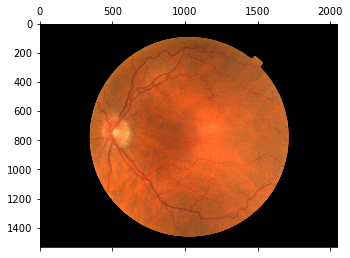

In [5]:
# Read in file
img = cv2.imread(file)
plt.matshow(img[:,:,::-1])

CPU times: user 45.4 ms, sys: 0 ns, total: 45.4 ms
Wall time: 43.9 ms


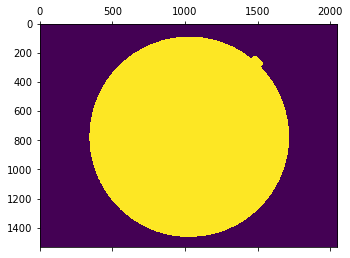

In [6]:
%%time
# Calculate a threshold mask
thres_img = (img[:,:,2] > 10).astype(np.uint8)
plt.matshow(thres_img)

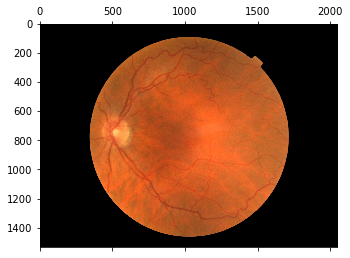

In [7]:
# Apply threshold mask to the image
img_thr = cv2.bitwise_and(img, img, mask=thres_img)
plt.matshow(img_thr[:,:,::-1])

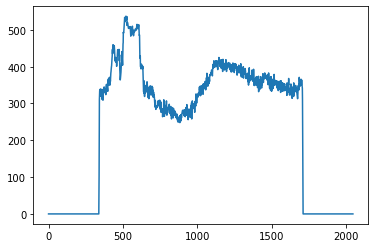

In [8]:
# Gets the row of pixels in the midle (vertically) of the Fundus
# Then sums their RGB values (R+G+B)
x = img_thr[img_thr.shape[0]//2, : , :].sum(1)
plt.plot(x)

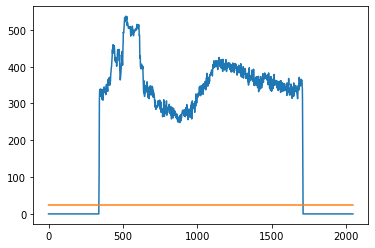

In [9]:
# Now, let's calculate a threshold (1/10 of the mean values)
t = np.ndarray(x.shape)
t.fill(x.mean()/10)
plt.plot(x) # R+G+B values
plt.plot(t) # Threshold

In [10]:
# Take as part of the fundus any pixel whose value is higher than the threshold 
r = (x > t).sum()/2
print(r)

686.0


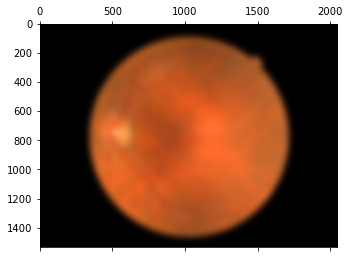

In [11]:
# Get the Gaussian Blur based on the radius of the Fundus
# Kernel standard deviation along X-axis (sigmax)/30
gaussian_blur = cv2.GaussianBlur(src=img_thr, ksize=(0, 0), sigmaX=r / 30)
plt.matshow(gaussian_blur[:,:,::-1])

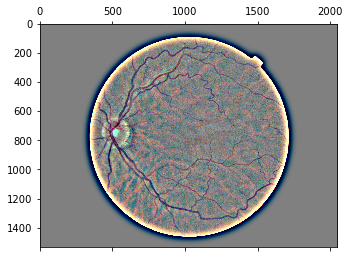

In [12]:
# Blend GB and Original Image
normalized_im = cv2.addWeighted(src1=img_thr, alpha=4, src2=gaussian_blur, beta=-4, gamma=128)
plt.matshow(normalized_im[:,:,::-1])

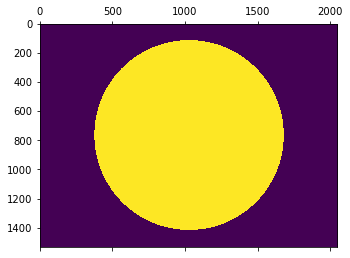

In [13]:
# To remove any boundary effects
# let's use the radius to calculate a mask 99%
mask = np.zeros((img_thr.shape[0], img_thr.shape[1]), dtype=np.uint8)
cv2.circle(img=mask, center=(img_thr.shape[1]//2, img_thr.shape[0]//2), radius=int(r*.95), color=(1,1,1,1), thickness=-1, lineType=8, shift=0)
plt.matshow(mask)

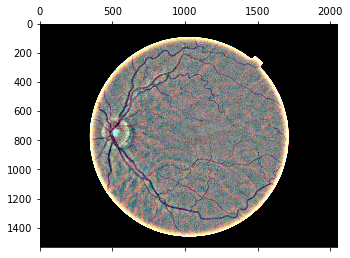

In [14]:
# Apply circular mask
normalized_im = cv2.bitwise_and(normalized_im, normalized_im, mask=thres_img)
plt.matshow(normalized_im[:,:,::-1])

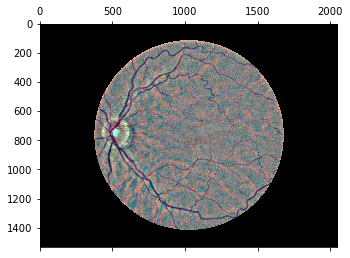

In [15]:
# Apply circular mask
normalized_im = cv2.bitwise_and(normalized_im, normalized_im, mask=mask)
plt.matshow(normalized_im[:,:,::-1])

In [16]:
# Save
cv2.imwrite(f"/home/ibarra/master_thesis/out/normalized-test.png", normalized_im)

True